In [1]:
import random
import matplotlib.pyplot as plt
import numpy
import pandas as pd


In [2]:
def random_num_of_rolled_dice_sequence(number_of_rolled_dice):   
    return [random.choice([1,2,3,4,5,6]) for i in range (number_of_rolled_dice)]

def show_dice_roll_counts_df(number_of_roll, number_of_trials = 1): 

    list_of_trial_results = []
    for i in range(number_of_trials):
        experiment= random_num_of_rolled_dice_sequence(number_of_roll)
        count_1= experiment.count(1)
        count_2= experiment.count(2)
        count_3= experiment.count(3)
        count_4= experiment.count(4)
        count_5= experiment.count(5)
        count_6= experiment.count(6)
        list_of_trial_results.append([count_1,count_2,count_3,count_4,count_5,count_6])
    
    return list_of_trial_results


In [3]:
number_of_roll= 1000
number_of_trials = 1000


In [4]:
# fair die roll with single trial
trial_results = show_dice_roll_counts_df(number_of_roll)

In [5]:
trial_results[0]

[146, 184, 166, 180, 164, 160]

In [6]:
def show_plots_single_trial(results):
    data=[{"occurance_of_1":results[0],"occurance_of_2":results[1],"occurance_of_3":results[2],
       "occurance_of_4":results[3],"occurance_of_5":results[4],"occurance_of_6":results[5]}]
    df=pd.DataFrame(data)

    df.plot.bar(figsize=(10,4)) 
    plt.xticks([])
    plt.xlabel("Side of a die")
    plt.ylabel("Occurance")
    plt.savefig('dice_rolled')

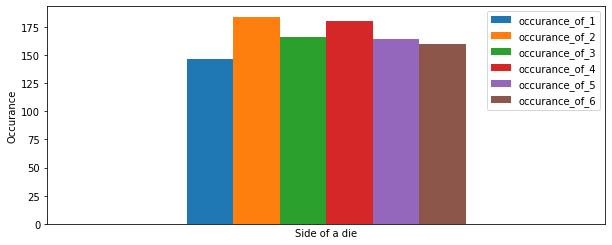

In [7]:
show_plots_single_trial(trial_results[0])

In [8]:
def show_plots_multi_trial(results, outcome = 1):
    data = []
    for r in results:
        data.append(r[outcome-1])
        
    plt.xlabel('number of side '+str(outcome))
    plt.ylabel('number of trials')
    plt.axis([min(data), max(data), 0, number_of_trials*0.10])
    plt.grid(True)
    _=plt.hist(data, bins=range(number_of_roll))
    plt.show()

In [9]:
# fair die roll with multiple trials 
trial_results = show_dice_roll_counts_df(number_of_roll, number_of_trials)

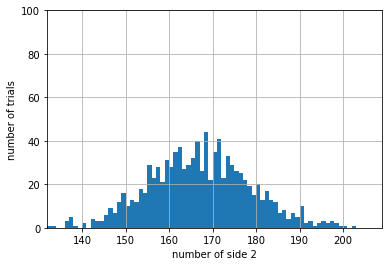

In [10]:
show_plots_multi_trial(trial_results, 2)

visualization of unfair outcome

In [11]:
def show_unfair_dice_roll_counts_df(number_of_roll, roll_sequence_generator= None, number_of_trials = 1): 
    
    list_of_trial_results = []
    
    for i in range(number_of_trials):
        if roll_sequence_generator== None:
            experiment= random_num_of_rolled_dice_sequence(number_of_roll)
        else:
            experiment= roll_sequence_generator(number_of_roll)
        
        count_1= experiment.count(1)
        count_2= experiment.count(2)
        count_3= experiment.count(3)
        count_4= experiment.count(4)
        count_5= experiment.count(5)
        count_6= experiment.count(6)
        list_of_trial_results.append([count_1,count_2,count_3,count_4,count_5,count_6])
    
    return list_of_trial_results


In [12]:
def create_random_biased_dice_roll_sequence(number_of_dice_roll):
    return [random.choices(range(1,7),[15,15,15,15,15,25])[0] for _ in range(number_of_dice_roll)]

In [13]:
# fair die roll with single trial
trial_results = show_unfair_dice_roll_counts_df(number_of_roll)

In [14]:
trial_results

[[154, 141, 167, 164, 190, 184]]

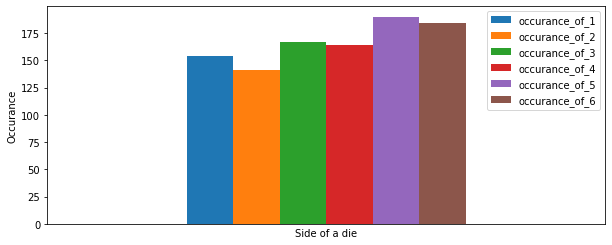

In [15]:
show_plots_single_trial(trial_results[0])

In [16]:
# unfair roll with single trials

trial_results = show_unfair_dice_roll_counts_df(100, create_random_biased_dice_roll_sequence)

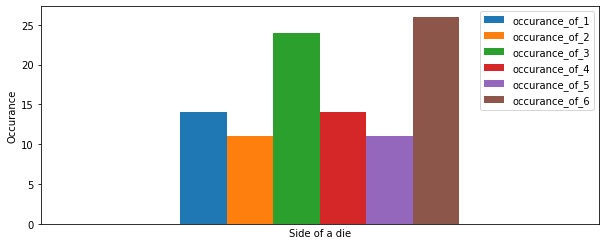

In [17]:
show_plots_single_trial(trial_results[0])

In [18]:
# unfair roll with multiple trials
trial_results = show_unfair_dice_roll_counts_df(100, create_random_biased_dice_roll_sequence, number_of_trials)

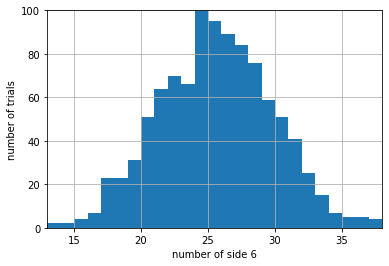

In [19]:
show_plots_multi_trial(trial_results, 6)